# Model `ELBMFPyTorch`

The PyTorch implementation by the author.

In [1]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

# from PyBMF.utils import cache, get_cache_path

/Users/felixnie/miniconda3/envs/pybmf/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
# Copyright 2018 The Cornac Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ============================================================================

import os
import shutil
import zipfile
import tarfile
import tempfile
from urllib import request

from tqdm.auto import tqdm


def _urlretrieve(url, fpath):
    """Retrieve data from given url

    Parameters
    ----------
    url: str
        The url to the data.

    fpath: str
        The path to file where data is stored.

    """
    opener = request.build_opener()
    opener.addheaders = [("User-agent", "Mozilla/5.0")]

    with tqdm(unit="B", unit_scale=True) as progress:

        def report(chunk, chunksize, total):
            progress.total = total
            progress.update(chunksize)

        request.install_opener(opener)
        request.urlretrieve(url, fpath, reporthook=report)


def _extract_archive(file_path, extract_path="."):
    """Extracts an archive.
    """
    for archive_type in ["zip", "tar"]:
        if archive_type == "zip":
            open_fn = zipfile.ZipFile
            is_match_fn = zipfile.is_zipfile
        elif archive_type == "tar":
            open_fn = tarfile.open
            is_match_fn = tarfile.is_tarfile

        if is_match_fn(file_path):
            with open_fn(file_path) as archive:
                try:
                    archive.extractall(extract_path)
                except (tarfile.TarError, RuntimeError, KeyboardInterrupt):
                    if os.path.exists(extract_path):
                        if os.path.isfile(extract_path):
                            os.remove(extract_path)
                        else:
                            shutil.rmtree(extract_path)
                    raise


def get_cache_path(relative_path, cache_dir=None):
    """Return the absolute path to the cached data file
    """
    if cache_dir is None and os.access(os.path.expanduser("~"), os.W_OK):
        cache_dir = os.path.join(os.path.expanduser("~"), ".pybmf")
        if not os.path.exists(cache_dir):
            os.makedirs(cache_dir)

    if not os.access(cache_dir, os.W_OK):
        cache_dir = os.path.join(tempfile.gettempdir(), ".pybmf")
    cache_path = os.path.join(cache_dir, relative_path)

    if not os.path.exists(os.path.dirname(cache_path)):
        os.makedirs(os.path.dirname(cache_path))

    return cache_path, cache_dir


def cache(url, unzip=False, relative_path=None, cache_dir=None):
    """Download the data and cache to file

    Parameters
    ----------
    url: str
        The url to the data.

    unzip: bool, optional, default: False
        Whether the data is a zip file and going to be unzipped after the download.

    relative_path: str
        Relative path to the data file after finishing the download.
        If unzip=True, relative_path is the path to unzipped file.

    cache_dir: str, optional, default: None
        The path to cache folder. If `None`, either ~/.cornac or /tmp/.cornac will be used.

    """
    if relative_path is None:
        relative_path = url.split("/")[-1]
    cache_path, cache_dir = get_cache_path(relative_path, cache_dir)
    if os.path.exists(cache_path):
        print("File exists at", cache_path)
        return cache_path

    print("Data from", url)
    print("will be cached into", cache_path)

    if unzip:
        tmp_path = os.path.join(cache_dir, "file.tmp")
        # tmp_path = os.path.join(os.path.dirname(cache_path), "file.tmp")
        _urlretrieve(url, tmp_path)
        print("Unzipping ...")
        _extract_archive(tmp_path, cache_dir)
        # _extract_archive(tmp_path, os.path.dirname(cache_path))
        os.remove(tmp_path)
    else:
        _urlretrieve(url, cache_path)

    print("File cached!")
    return cache_path

/Users/felixnie/miniconda3/envs/pybmf/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
fname = 'data_small'
cache(url='https://static.preferred.ai/cornac/datasets/netflix/{}.zip'.format(fname), unzip=True, relative_path='data/netflix/{}.csv'.format(fname))

Data from https://static.preferred.ai/cornac/datasets/netflix/data_small.zip
will be cached into /Users/felixnie/.pybmf/data/netflix/data_small.csv


4.46MB [00:00, 8.79MB/s]                            


Unzipping ...
File cached!


'/Users/felixnie/.pybmf/data/netflix/data_small.csv'

In [8]:
fname = 'data'
cache(url='https://static.preferred.ai/cornac/datasets/netflix/{}.zip'.format(fname), unzip=True, relative_path='data/netflix/{}.csv'.format(fname))

Data from https://static.preferred.ai/cornac/datasets/netflix/data.zip
will be cached into /Users/felixnie/.pybmf/data/netflix/data.csv


713MB [00:49, 14.5MB/s]                              


Unzipping ...
File cached!


'/Users/felixnie/.pybmf/data/netflix/data.csv'

In [9]:
cache("https://raw.githubusercontent.com/felixnie/movie_titles/main/movie_titles.csv", relative_path="data/netflix/movie_titles.csv", unzip=False)

Data from https://raw.githubusercontent.com/felixnie/movie_titles/main/movie_titles.csv
will be cached into /Users/felixnie/.pybmf/data/netflix/movie_titles.csv


590kB [00:00, 843kB/s]                             

File cached!


'/Users/felixnie/.pybmf/data/netflix/movie_titles.csv'

In [4]:
cache("http://files.grouplens.org/datasets/movielens/ml-100k.zip", relative_path="data/movielens/ml-100k/u.data", unzip=True)

Data from http://files.grouplens.org/datasets/movielens/ml-100k.zip
will be cached into /Users/felixnie/.pybmf/data/movielens/ml-100k/u.data


4.94MB [00:02, 2.21MB/s]                            


Unzipping ...
File cached!


'/Users/felixnie/.pybmf/data/movielens/ml-100k/u.data'

In [7]:
cache("http://files.grouplens.org/datasets/movielens/ml-1m.zip", relative_path="data/movielens/ml-1m/ratings.dat", unzip=True)

Data from http://files.grouplens.org/datasets/movielens/ml-1m.zip
will be cached into /Users/felixnie/.pybmf/data/movielens/ml-1m/ratings.dat


5.93MB [00:02, 2.63MB/s]                            

Unzipping ...
File cached!


'/Users/felixnie/.pybmf/data/movielens/ml-1m/ratings.dat'

In [8]:
get_cache_path(relative_path="data/movielens/ml-1m/ratings.dat", cache_dir=None)

('/Users/felixnie/.pybmf/data/movielens/ml-1m/ratings.dat',
 '/Users/felixnie/.pybmf')

In [8]:
# Copyright 2018 The Cornac Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ============================================================================
"""Link to the data: https://grouplens.org/datasets/movielens/"""

from typing import List
from collections import namedtuple

# from ..utils import validate_format
# import cache
# from ..data import Reader
# from ..data.reader import read_text


VALID_DATA_FORMATS = ["UIR", "UIRT"]

MovieLens = namedtuple("MovieLens", ["url", "unzip", "path", "sep", "skip"])
ML_DATASETS = {
    "100K": MovieLens(
        "http://files.grouplens.org/datasets/movielens/ml-100k/u.data",
        False,
        "ml-100k/u.data",
        "\t",
        0,
    ),
    "1M": MovieLens(
        "http://files.grouplens.org/datasets/movielens/ml-1m.zip",
        True,
        "ml-1m/ratings.dat",
        "::",
        0,
    ),
    "10M": MovieLens(
        "http://files.grouplens.org/datasets/movielens/ml-10m.zip",
        True,
        "ml-10M100K/ratings.dat",
        "::",
        0,
    ),
    "20M": MovieLens(
        "http://files.grouplens.org/datasets/movielens/ml-20m.zip",
        True,
        "ml-20m/ratings.csv",
        ",",
        1,
    ),
}


def load_feedback(fmt="UIR", variant="100K", reader=None):
    """Load the user-item ratings of one of the MovieLens datasets

    Parameters
    ----------
    fmt: str, default: 'UIR'
        Data format to be returned, one of ['UIR', 'UIRT'].

    variant: str, optional, default: '100K'
        Specifies which MovieLens dataset to load, one of ['100K', '1M', '10M', '20M'].

    reader: `obj:cornac.data.Reader`, optional, default: None
        Reader object used to read the data.

    Returns
    -------
    data: array-like
        Data in the form of a list of tuples depending on the given data format.
    """

    # fmt = validate_format(fmt, VALID_DATA_FORMATS)

    ml = ML_DATASETS.get(variant.upper(), None)
    if ml is None:
        raise ValueError("variant must be one of {}.".format(ML_DATASETS.keys()))

    fpath = cache(url=ml.url, unzip=ml.unzip, relative_path=ml.path)
    # reader = Reader() if reader is None else reader
    # return reader.read(fpath, fmt, sep=ml.sep, skip_lines=ml.skip)
    return fpath


# def load_plot():
#     """Load the plots of movies provided @ http://dm.postech.ac.kr/~cartopy/ConvMF/

#     Returns
#     -------
#     texts: List
#         List of text documents, one per item.

#     ids: List
#         List of item ids aligned with indices in `texts`.
#     """
#     fpath = cache(
#         url="https://static.preferred.ai/cornac/datasets/movielens/ml_plot.zip",
#         unzip=True,
#         relative_path="movielens/ml_plot.dat",
#     )
#     texts, ids = read_text(fpath, sep="::")
#     return texts, ids

In [12]:
load_feedback()

File exists at C:\Users\nieht\.pybmf\ml-100k/u.data


'C:\\Users\\nieht\\.pybmf\\ml-100k/u.data'

In [8]:
# use project files rather than the installed PyBMF
 
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

from PyBMF.models.ELBMFPyTorch import ELBMF

import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'ELBMF' from 'PyBMF.models.ELBMFPyTorch' (d:\MEGA\PyBMF\examples\..\PyBMF\models\ELBMFPyTorch.py)

In [ ]:
# loading real-world data from datasets of ELBMF-Julia

df = pd.read_csv('D:\PyBMF-bulky\data\data-elbmf\Brain_Cerebellum-z.tsv', header=None, sep=r'\t')

spmat = csr_matrix(df.astype(pd.SparseDtype("float64", 0)).sparse.to_coo())

NameError: name 'pd' is not defined

In [ ]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

In [4]:
# # loading real-world data

# from PyBMF.datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

# data.show_matrix(scaling=0.5)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


In [5]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

split = NoSplit(X=data.X)

# split.negative_sample(size=split.pos_size, type="popularity", seed=2023)

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1720747986
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1720747986


# 1 Init U, V with `NMFSklearn` / `WNMF`

In [6]:
# from models import NMFSklearn, WNMF
# from utils import show_factor_distribution

# k = 100

# model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
# # model_nmf = WNMF(k=k, W='full', beta_loss='frobenius', init_method='normal', max_iter=1000, seed=2024)

# model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

# # show_factor_distribution(U=model_nmf.U, V=model_nmf.V, resolution=100)

# 2. `ELBMF`

[I] k            : 100
[I] U            : None
[I] V            : None
[I] init_method  : uniform
[I] reg_l1       : 0
[I] reg_l2       : 0.02
[I] reg_growth   : 1.0002
[I] max_iter     : 5000
[I] min_diff     : 1e-08
[I] beta         : 0
[I] seed         : 1720782407
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
torch.Size([300, 500]) <class 'torch.Tensor'>
100
None
None
0
0.02
<function ELBMF._fit.<locals>.<lambda> at 0x0000020F5CD11280>
5000
1e-08
0
None
True
1720782407


[I] error: 1889.6002, U: [0.0000, 3.5503], V: [0.0000, 3.7823]: 100%|██████████| 5000/5000 [00:43<00:00, 114.33it/s]


[W] Timer not started.
[I] model saved as: 24-07-12_19-07-31_ELBMF.pickle


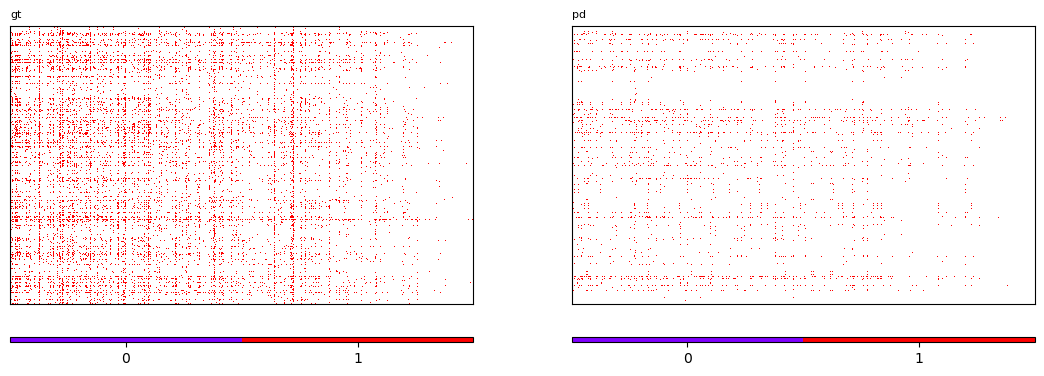

train                             
                             0                             
                time    Recall Precision Accuracy        F1
0  12/07/24 07:07:31  0.229031  0.926288  0.94342  0.367256

<Figure size 640x480 with 0 Axes>

In [17]:
k = 100
reg_l1 = 0#0.01
reg_l2 = 0.02
reg_growth = 1.0002
max_iter = 5000
min_diff = 1e-8
beta = 0 # 0.0001
seed = None
task = 'reconstruction'

U, V, init_method = None, None, 'uniform'
# U, V, init_method = model_nmf.U.copy(), model_nmf.V.copy(), 'custom'

model = ELBMF(k=k, U=U, V=V, init_method=init_method, reg_l1=reg_l1, reg_l2=reg_l2, reg_growth=reg_growth, max_iter=max_iter, min_diff=min_diff, beta=beta, seed=seed)
model.fit(X_train=X_train, task=task)

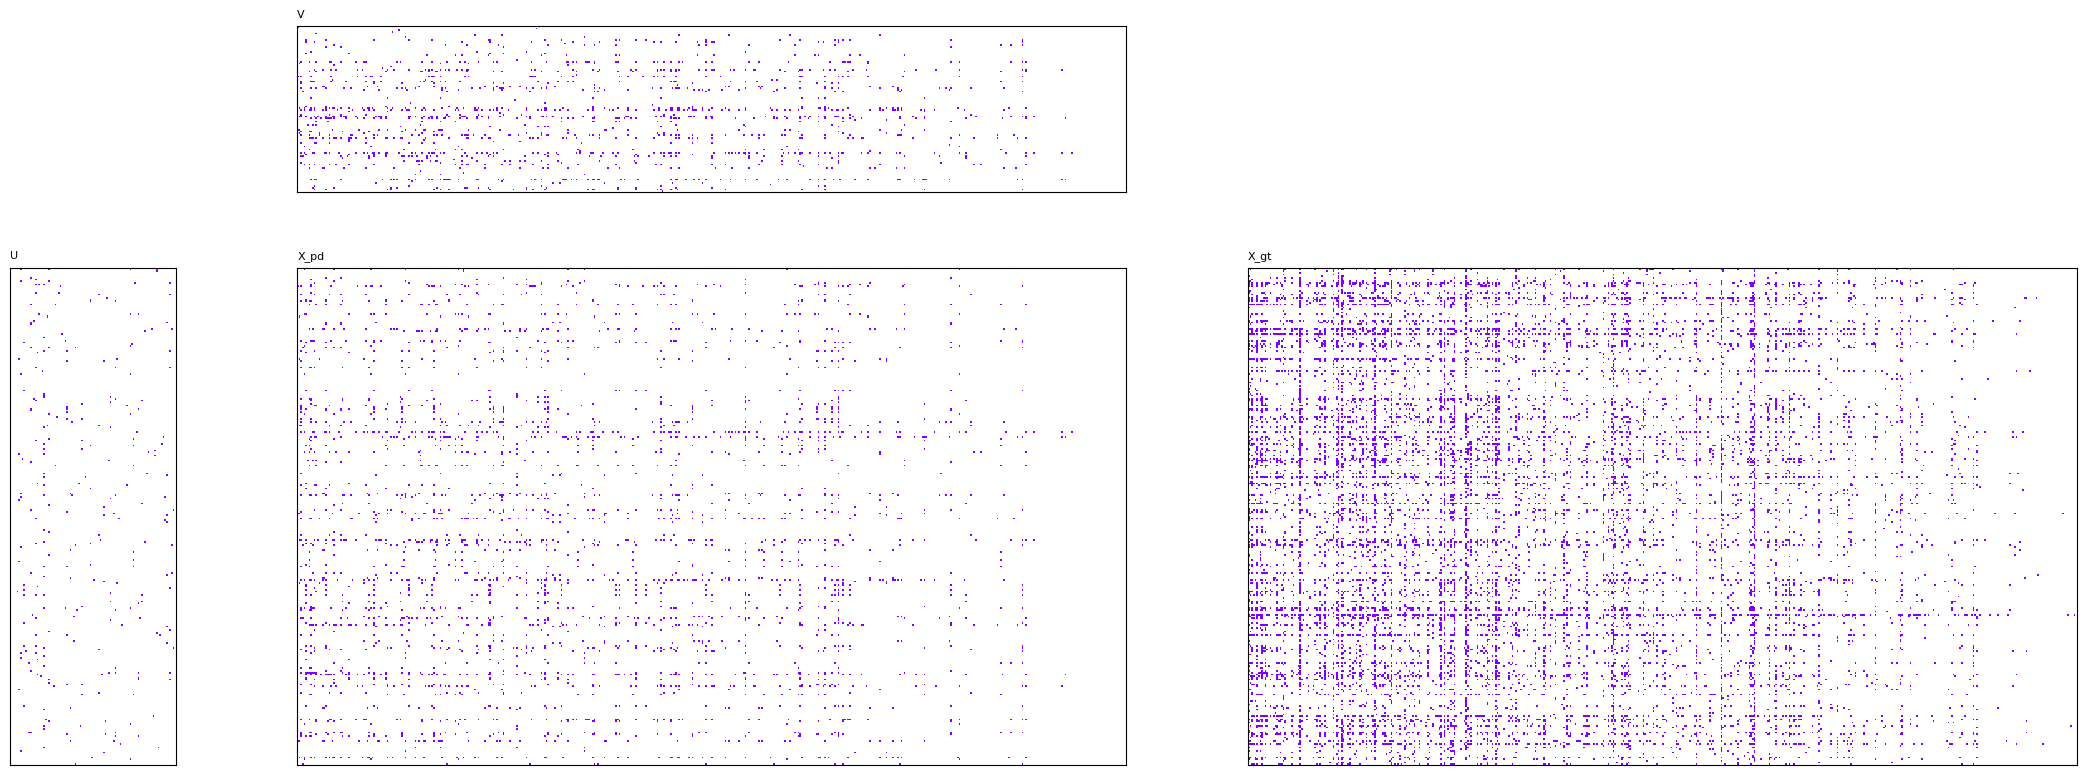

<Figure size 640x480 with 0 Axes>

In [14]:
import numpy as np
import torch
from models.ELBMF import elbmf

X = np.array(X_train.toarray(), dtype=np.float64)
X = torch.from_numpy(X).float()

import torch
from models import ELBMF

U, V = elbmf(
    X                   = X,                  # a Boolean n*m matrix  
    n_components        = 100,                 # number of components
    l1reg               = 0.001,               # l1 coefficient
    l2reg               = 0.002,               # l2 coefficient
    regularization_rate = lambda t: 1.0025**t,  # monotonically increasing regularization-rate function
    maxiter             = 10000,               # maximum number of iterations
    tolerance           = 1e-8,               # the threshold to the absolute difference between the current and previous losses determines the convergence
    beta                = 0.0,             # inertial coefficient of iPALM
    callback            = None,               # e.g. lambda t, U, V, fn: print(t, fn)
    with_rounding       = True)               # rounds U and V in case of early stopping



from utils import show_matrix, matmul
from scipy.sparse import csr_matrix

U_sparse, V_sparse = csr_matrix(U), csr_matrix(V)
X_sparse = matmul(U_sparse, V_sparse, boolean=True, sparse=True)
X_original = csr_matrix(X)

show_matrix([(U_sparse, [1, 0], 'U'), (V_sparse, [0, 1], 'V'), (X_sparse, [1, 1], 'X_pd'), (X_original, [1, 2], 'X_gt')])